In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math

import sys
sys.path.append('../scripts/code')

from pce import PCE
import distribution as distr
from test_functions_a import *

%matplotlib inline

In [2]:
exp_name = 'experiments/test_accuracy_new_3_'
save_all = True

In [3]:
seed = 0
np.random.seed(seed)

In [4]:
n_test = 10**6

## Experiment: Ishigami function

In [5]:
#  =======================================================================
# Define Ishigami 

dim = 3
def function(X):
    return ishigami(X)[:, np.newaxis]


lb = -1.0 * math.pi
ub = math.pi 

true_Sobol_indices = get_indices_ishigami(full=True) # 


#  ==================================================================
# Approximation setting

total_degree = 20
q_norm = 0.75


#  ==================================================================
# Experiment setting

start_power = 2.9115 #2.92 #2 #!!!
end_power = 4 #5#3.5 #!!!
num = 110 #100 # 50 #!!!

function_name = 'Ishigami'



#  ==================================================================



In [6]:
exp_name += function_name

## Experiment: test

In [7]:
print('main:', true_Sobol_indices['main'])
print('total:',true_Sobol_indices['total'])

main: {(1,): 0.31390519114781146, (2,): 0.4424111447900409, (1, 2): 0.0, (3,): 0.0, (1, 3): 0.24368366406214773, (2, 3): 0.0, (1, 2, 3): 0.0}
total: {(1,): 0.5575888552099592, (2,): 0.4424111447900409, (1, 2): 1, (3,): 0.24368366406214773, (1, 3): 0.557588855209959, (2, 3): 0.6860948088521885, (1, 2, 3): 1}


In [ ]:
import os
import dill
print(dill.__version__)

db_name = exp_name+'.db'
if os.path.isfile(db_name):
    print('\n=============== Loading %s ======================\n'%db_name)
    #dill.load_session(db_name) #!!!
    raise SystemExit("Workspace is loaded.")
else:
    print('Workspace %s not found'%db_name)

### Code

In [11]:
ranges = lb * np.ones((dim, 2))
ranges[:, 0] = ub


test_X = np.random.rand(n_test, dim)
test_X = (ranges[:, 1] - ranges[:, 0]) * test_X + ranges[:, 0]


test_Y = function(test_X)

# true_Sobol_indices_selected = get_indices_sobol_g_func(sobol_a)
# true_SI = true_Sobol_indices_selected['main']
# true_TI = true_Sobol_indices_selected['total']

# print('main:', true_SI)
# print('main:', true_SI_full, '\n')

true_SI_full = true_Sobol_indices['main']
true_TI_full = true_Sobol_indices['total']



groups = tuple(true_SI_full.keys())

S_full = [true_SI_full[g] for g in groups]
T_full = [true_TI_full[g] for g in groups]

# S_full, T_full

In [12]:
#basis_truncation = {'max_degree':max_degree}
basis_truncation = {'total_degree':total_degree, 'q_norm':q_norm}

In [13]:
marginals = distr.Marginals([distr.Uniform(lb, ub)]*dim)

model = PCE(marginals, basis_truncation)

print(model)

print('\nbasis_functions_number:', model._basis_functions_number)

PCE(marginals=Marginals([Uniform(a=-3.141592653589793, b=3.141592653589793, Legendre), Uniform(a=-3.141592653589793, b=3.141592653589793, Legendre), Uniform(a=-3.141592653589793, b=3.141592653589793, Legendre)]), basis_truncation={'total_degree': 20, 'q_norm': 0.75})

basis_functions_number: 815


In [14]:
indices_full_number = len(groups)

indices_full_number, groups

(7, ((1,), (2,), (1, 2), (3,), (1, 3), (2, 3), (1, 2, 3)))

In [15]:
groups

((1,), (2,), (1, 2), (3,), (1, 3), (2, 3), (1, 2, 3))

In [16]:
# np.logspace(2.9115, end_power, num=num, endpoint=True, base=10.0, dtype=np.int)

In [17]:
%%time


sample_sizes = np.logspace(start_power, end_power, num=num, endpoint=True, base=10.0, dtype=np.int)
print('sample_sizes', sample_sizes)

rrmse = np.nan * np.ones((len(sample_sizes)))
appr_SI =  np.nan * np.ones((len(sample_sizes), indices_full_number))
appr_TI =  np.nan * np.ones((len(sample_sizes),  indices_full_number))


max_n = max(sample_sizes)
all_X = (ranges[:, 1] - ranges[:, 0]) * np.random.rand(max_n, dim) + ranges[:, 0]
all_Y = function(all_X)


for i, n in enumerate(sample_sizes):
    
    print(i, n)
    
    X = all_X[:n].copy()
    Y = all_Y[:n].copy()


    if model._basis_functions_number <= n:
        model.fit(X, Y, method='ls') # 'projection' 

        rrmse[i] = model.validate(test_X, test_Y)['rrmse']
        full_SI = model.get_sobol_indices(ind_type='main', full=True)
        full_TI = model.get_sobol_indices(ind_type='total', full=True)
        
        appr_SI[i] = [full_SI[g] for g in groups]
        appr_TI[i] = [full_TI[g] for g in groups]
        
    else:
        rrmse[i] = np.nan
        appr_SI[i] = np.nan
        appr_TI[i] = np.nan
        
        
        

sample_sizes [  815   834   854   873   894   915   936   958   980  1003  1026  1050
  1074  1099  1125  1151  1178  1205  1233  1262  1291  1321  1352  1384
  1416  1449  1483  1517  1552  1588  1625  1663  1702  1741  1782  1823
  1866  1909  1954  1999  2046  2093  2142  2192  2243  2295  2348  2403
  2459  2516  2575  2635  2696  2759  2823  2888  2956  3024  3095  3167
  3240  3316  3393  3472  3553  3635  3720  3806  3895  3986  4078  4173
  4270  4370  4471  4575  4682  4791  4902  5016  5133  5252  5374  5499
  5627  5758  5892  6029  6170  6313  6460  6610  6764  6921  7082  7247
  7416  7588  7765  7945  8130  8319  8513  8711  8913  9121  9333  9550
  9772 10000]
0 815


/home/ivan/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:2125: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


1 834
2 854
3 873
4 894
5 915
6 936
7 958
8 980
9 1003
10 1026
11 1050
12 1074
13 1099
14 1125
15 1151
16 1178
17 1205
18 1233
19 1262
20 1291
21 1321
22 1352
23 1384
24 1416
25 1449
26 1483
27 1517
28 1552
29 1588
30 1625
31 1663
32 1702
33 1741
34 1782
35 1823
36 1866
37 1909
38 1954
39 1999
40 2046
41 2093
42 2142
43 2192
44 2243
45 2295
46 2348
47 2403
48 2459
49 2516
50 2575
51 2635
52 2696
53 2759
54 2823
55 2888
56 2956
57 3024
58 3095
59 3167
60 3240
61 3316
62 3393
63 3472
64 3553
65 3635
66 3720
67 3806
68 3895
69 3986
70 4078
71 4173
72 4270
73 4370
74 4471
75 4575
76 4682
77 4791
78 4902
79 5016
80 5133
81 5252
82 5374
83 5499
84 5627
85 5758
86 5892
87 6029
88 6170
89 6313
90 6460
91 6610
92 6764
93 6921
94 7082
95 7247
96 7416
97 7588
98 7765
99 7945
100 8130
101 8319
102 8513
103 8711
104 8913
105 9121
106 9333
107 9550
108 9772
109 10000
CPU times: user 14h 48min 47s, sys: 1h 4min 13s, total: 15h 53min
Wall time: 2h 40min 51s


In [18]:
abs_indices_errors = np.hstack((np.abs(appr_SI - S_full), np.abs(appr_TI - T_full)))

In [19]:
max_abs_indices_errors = np.max(abs_indices_errors, axis=1)
err_S = max_abs_indices_errors
err_S

array([5.67618024e-05, 5.41761175e-07, 8.75706996e-08, 1.11876102e-07,
       6.04340776e-08, 3.00569599e-08, 4.50038142e-08, 2.34156743e-08,
       7.94399285e-09, 2.34582352e-08, 9.83144022e-09, 7.61398572e-09,
       1.27873256e-08, 5.84202692e-09, 1.21346014e-08, 8.47780407e-09,
       8.61911342e-09, 1.07972674e-08, 1.19079895e-08, 1.44775865e-08,
       2.74152466e-08, 1.88701478e-08, 1.93621865e-08, 6.36999409e-09,
       6.15155371e-10, 4.12069823e-09, 4.30443248e-09, 1.51711016e-09,
       9.61067143e-10, 1.82791121e-09, 4.10860401e-10, 2.56746235e-10,
       2.59250132e-09, 3.25599225e-09, 3.41270334e-09, 2.25507046e-09,
       2.17861162e-09, 2.40600939e-09, 3.35898021e-09, 2.52466847e-09,
       2.37751574e-09, 1.93184202e-09, 2.15782991e-09, 1.38150258e-09,
       1.29643074e-09, 9.61396851e-10, 7.18303916e-10, 6.37553399e-10,
       9.08678410e-10, 6.53002374e-10, 7.88952570e-10, 5.26284460e-10,
       4.57477861e-10, 6.37431663e-10, 6.66677102e-10, 6.27761287e-10,
      

In [20]:
sum_indices_errors = np.sum(np.abs(appr_SI - S_full), axis=1)
sum_indices_errors_squared = np.sum(np.abs(appr_SI - S_full)**2, axis=1)

sum_indices_errors, sum_indices_errors_squared

(array([1.34244480e-04, 1.08353069e-06, 1.75141397e-07, 2.23752949e-07,
        1.20868159e-07, 6.01183048e-08, 9.00076284e-08, 4.68313457e-08,
        1.58881099e-08, 4.69164682e-08, 1.96635631e-08, 1.52279744e-08,
        2.55746531e-08, 1.16845141e-08, 2.42692037e-08, 1.69556507e-08,
        1.72382714e-08, 2.15945578e-08, 2.38160031e-08, 2.89551779e-08,
        5.48305004e-08, 3.77402950e-08, 3.87243739e-08, 1.27399889e-08,
        1.23031489e-09, 8.24139713e-09, 8.60886438e-09, 3.03422452e-09,
        1.92213904e-09, 3.65585134e-09, 8.21724968e-10, 5.13491078e-10,
        5.18500199e-09, 6.51198449e-09, 6.82540748e-09, 4.51014087e-09,
        4.35722320e-09, 4.81201788e-09, 6.71795998e-09, 5.04933712e-09,
        4.75503136e-09, 3.86368377e-09, 4.31566037e-09, 2.76300618e-09,
        2.59286698e-09, 1.92279785e-09, 1.43661070e-09, 1.27511011e-09,
        1.81735896e-09, 1.30600684e-09, 1.57790689e-09, 1.05257034e-09,
        9.14957245e-10, 1.27486384e-09, 1.33335530e-09, 1.255523

In [21]:
sample_sizes

array([  815,   834,   854,   873,   894,   915,   936,   958,   980,
        1003,  1026,  1050,  1074,  1099,  1125,  1151,  1178,  1205,
        1233,  1262,  1291,  1321,  1352,  1384,  1416,  1449,  1483,
        1517,  1552,  1588,  1625,  1663,  1702,  1741,  1782,  1823,
        1866,  1909,  1954,  1999,  2046,  2093,  2142,  2192,  2243,
        2295,  2348,  2403,  2459,  2516,  2575,  2635,  2696,  2759,
        2823,  2888,  2956,  3024,  3095,  3167,  3240,  3316,  3393,
        3472,  3553,  3635,  3720,  3806,  3895,  3986,  4078,  4173,
        4270,  4370,  4471,  4575,  4682,  4791,  4902,  5016,  5133,
        5252,  5374,  5499,  5627,  5758,  5892,  6029,  6170,  6313,
        6460,  6610,  6764,  6921,  7082,  7247,  7416,  7588,  7765,
        7945,  8130,  8319,  8513,  8711,  8913,  9121,  9333,  9550,
        9772, 10000])

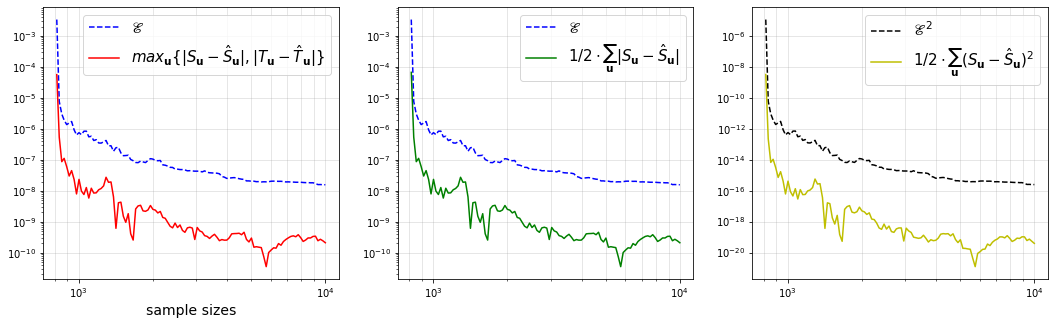

In [94]:
sample_sizes = np.array(sample_sizes)

ind = sample_sizes > 0 # sample_sizes > 500 

plt.figure(figsize=(18, 5))

marker = ''#'o'

fontsize = 15 # legend

plt.subplot(1,3,1)
plt.loglog(sample_sizes[ind], rrmse[ind], label='$\mathscr{E}$',linestyle='--', marker=marker, color='b')
plt.loglog(sample_sizes[ind], err_S[ind], 
           label='$max_\mathbf{u}\{|S_\mathbf{u} - \hat{S}_\mathbf{u}|, |T_\mathbf{u} - \hat{T}_\mathbf{u}|\}$',
           marker=marker, color='r')
plt.legend(loc='best', fontsize=fontsize)
plt.grid(b=True, which='both', color='#999999', axis='x',linestyle='-', alpha=0.3)
plt.grid(b=True, which='major', color='#999999', axis='y',linestyle='-', alpha=0.3)
plt.xlabel('sample sizes', fontsize=14)


#plt.figure(figsize=(12, 5))
plt.subplot(1,3,2)
plt.loglog(sample_sizes[ind], rrmse[ind], label='$\mathscr{E}$',linestyle='--', marker=marker, color='b')
plt.loglog(sample_sizes[ind], 0.5 * sum_indices_errors[ind], 
           label='$1/2 \cdot \sum_\mathbf{u} |S_\mathbf{u} - \hat{S}_\mathbf{u}|$',
           marker=marker, color='g')
plt.legend(loc='best', fontsize=fontsize)
plt.grid(b=True, which='both', color='#999999', axis='x',linestyle='-', alpha=0.3)
plt.grid(b=True, which='major', color='#999999', axis='y',linestyle='-', alpha=0.3)

plt.subplot(1,3,3)
plt.loglog(sample_sizes[ind], rrmse[ind]**2, label='$\mathscr{E}^2$',linestyle='--', marker=marker, 
           color='k')
plt.loglog(sample_sizes[ind],  0.5 *  sum_indices_errors_squared[ind], 
           label='$1/2 \cdot \sum_\mathbf{u} (S_\mathbf{u} - \hat{S}_\mathbf{u})^2$', 
           marker=marker, color='y')
plt.legend(loc='best', fontsize=fontsize)


plt.grid(b=True, which='both', color='#999999', axis='x',linestyle='-', alpha=0.3)
plt.grid(b=True, which='major', color='#999999', axis='y',linestyle='-', alpha=0.3)

if save_all:
    fname = exp_name+'_theoretical.png'
    plt.savefig(fname, dpi=300, bbox_inches='tight', pad_inches=0.05)



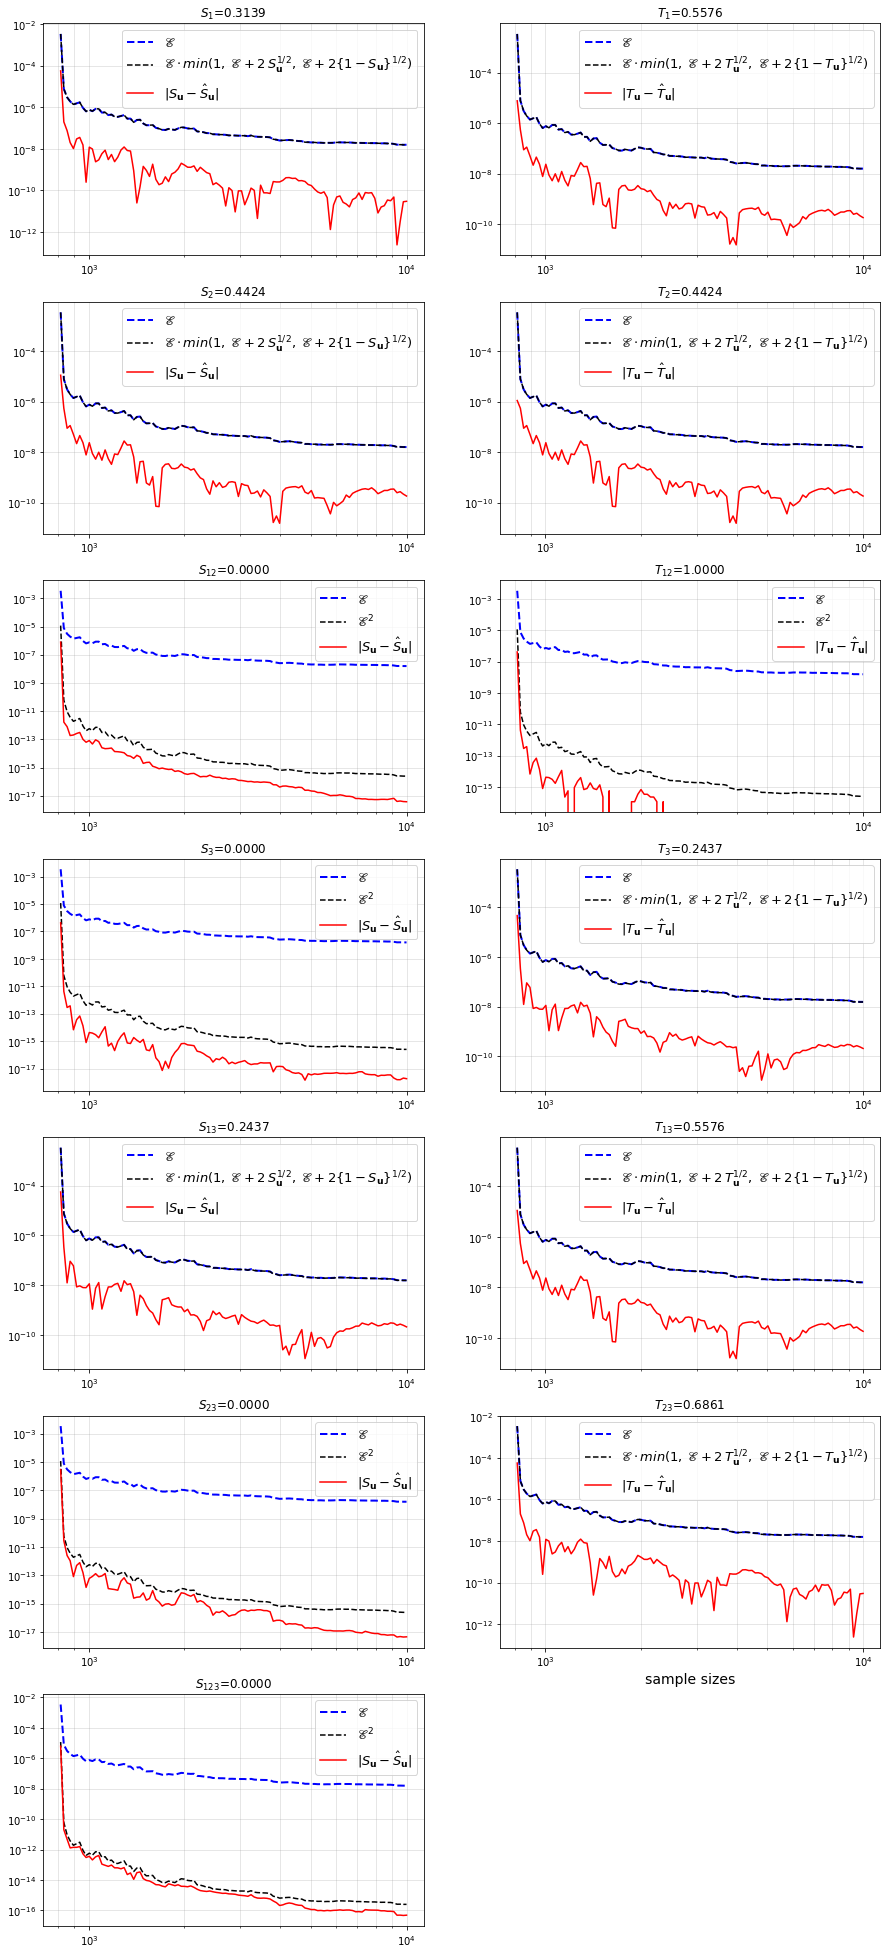

In [76]:
text_groups = ["".join([str(i) for i in g]) for g in groups]


dS = np.abs(appr_SI - S_full)
dT = np.abs(appr_TI - T_full)

marker = ''
fontsize = 13 # legend


ind = sample_sizes > 0 # sample_sizes > 500 

pics_num = appr_SI.shape[1]

plt.figure(figsize=(15, 5*pics_num))
for i in range(pics_num):
    
    # Sobol indices
    
        
    if S_full[i] in [0, 1]:
        label_S = '$\mathscr{E}^2$'
        bound_S = rrmse**2
    
    else:

        label_S = '$ \mathscr{E} \cdot min (1, \; \mathscr{E} + 2 \, S^{1/2}_{\mathbf{u}}, \;  \mathscr{E} + 2 \{1-S_{\mathbf{u}}\}^{1/2} )  $'
        
        temp_min = np.minimum(rrmse + 2 * math.sqrt(S_full[i]),  rrmse + 2 * math.sqrt(max(0, 1-S_full[i])))
        temp_min[temp_min > 1] = 1
        bound_S = temp_min * rrmse

    

    plt.subplot(pics_num, 2, i*2+1)
    plt.title('$S_{{{}}}$={:.4f}'.format(text_groups[i], S_full[i]))

    plt.loglog(sample_sizes[ind], rrmse[ind], label='$\mathscr{E}$',linestyle='--', 
               marker=marker, color='b', linewidth=2)
    plt.loglog(sample_sizes[ind], bound_S[ind], 
               label=label_S,
               linestyle='--', marker=marker, color='k')

    plt.loglog(sample_sizes[ind], dS[ind, i], label='$|S_\mathbf{u} - \hat{S}_\mathbf{u}|$',
            marker=marker, color='r')
    plt.legend(loc='best', fontsize=fontsize)
    
    plt.grid(b=True, which='both', color='#999999', axis='x',linestyle='-', alpha=0.3)
    plt.grid(b=True, which='major', color='#999999', axis='y',linestyle='-', alpha=0.3)
    


    # Total effects
    
    if i == pics_num-1:
        continue

    if T_full[i] in [0, 1]:
        label_T = '$\mathscr{E}^2$'
        bound_T = rrmse**2
    
    else:
        label_T = '$\mathscr{E} \cdot  min (1, \; \mathscr{E} + 2 \, T^{1/2}_{\mathbf{u}}, \;  \mathscr{E} + 2 \{1-T_{\mathbf{u}}\}^{1/2} )  $'
        
        temp_min = np.minimum(rrmse + 2 * math.sqrt(T_full[i]),  rrmse + 2 * math.sqrt(max(0, 1-T_full[i])))
        temp_min[temp_min > 1] = 1
        bound_T = temp_min * rrmse

        
    plt.subplot(pics_num, 2, i*2+2)
    plt.title('$T_{{{}}}$={:.4f}'.format(text_groups[i], T_full[i]))

    plt.loglog(sample_sizes[ind], rrmse[ind], label='$\mathscr{E}$',linestyle='--', 
               marker=marker, color='b', linewidth=2)
    
    plt.loglog(sample_sizes[ind], bound_T[ind], 
               label=label_T,
               linestyle='--', marker=marker, color='k')
    
    plt.loglog(sample_sizes[ind], dT[ind, i], label='$|T_\mathbf{u} - \hat{T}_\mathbf{u}|$',
              marker=marker, color='r')
    
    plt.legend(loc='best', fontsize=fontsize)
    plt.grid(b=True, which='both', color='#999999', axis='x',linestyle='-', alpha=0.3)
    plt.grid(b=True, which='major', color='#999999', axis='y',linestyle='-', alpha=0.3)
    
    
    if i == pics_num-2:
        plt.xlabel('sample sizes', fontsize=14)

if save_all:
    fname = exp_name+'_theoretical_each_u.png'
    plt.savefig(fname, dpi=300, bbox_inches='tight', pad_inches=0.05)

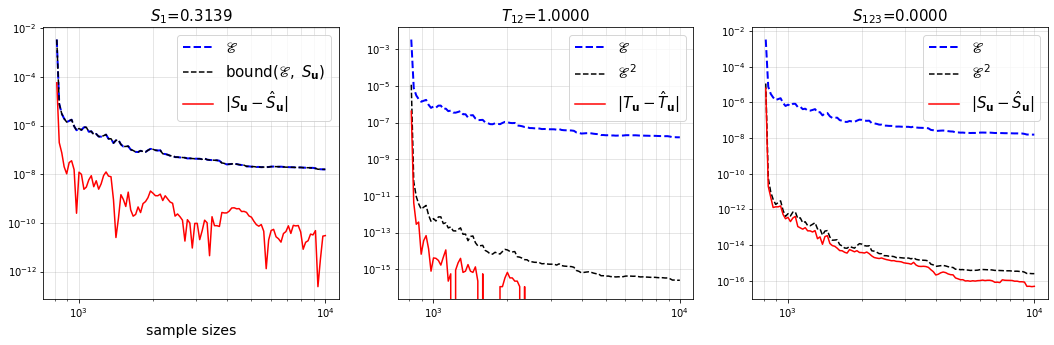

In [97]:
plt.figure(figsize=(18, 5))

selected_pics = [1, 6, 13]


cnt = 1

fontsize = 15 # legend
 
for i in range(pics_num):

    
    if i*2+1 in selected_pics: 
        if S_full[i] in [0, 1]:
            label_S = '$\mathscr{E}^2$'
            bound_S = rrmse**2

        else:

            #label_S = '$ \mathscr{E} \cdot min (1, \; \mathscr{E} + 2 \, S^{1/2}_{\mathbf{u}}, \;  \mathscr{E} + 2 \{1-S_{\mathbf{u}}\}^{1/2} )  $'
            label_S = 'bound$(\mathscr{E}, \; S_{\mathbf{u}})$'

            
            temp_min = np.minimum(rrmse + 2 * math.sqrt(S_full[i]),  rrmse + 2 * math.sqrt(max(0, 1-S_full[i])))
            temp_min[temp_min > 1] = 1
            bound_S = temp_min * rrmse



        plt.subplot(1, len(selected_pics), cnt)
        cnt += 1
        
        plt.title('$S_{{{}}}$={:.4f}'.format(text_groups[i], S_full[i]), fontsize=fontsize)

        plt.loglog(sample_sizes[ind], rrmse[ind], label='$\mathscr{E}$',linestyle='--', 
                   marker=marker, color='b', linewidth=2)
        plt.loglog(sample_sizes[ind], bound_S[ind], 
                   label=label_S,
                   linestyle='--', marker=marker, color='k')

        plt.loglog(sample_sizes[ind], dS[ind, i], label='$|S_\mathbf{u} - \hat{S}_\mathbf{u}|$',
                marker=marker, color='r')
        plt.legend(loc='best', fontsize=fontsize)

        plt.grid(b=True, which='both', color='#999999', axis='x',linestyle='-', alpha=0.3)
        plt.grid(b=True, which='major', color='#999999', axis='y',linestyle='-', alpha=0.3)
        
        if i*2+1 == 1:
            plt.xlabel('sample sizes', fontsize=14)



    # Total effects
    
    if i*2+2 in selected_pics: 
    
        if i == pics_num-1:
            continue

        if T_full[i] in [0, 1]:
            label_T = '$\mathscr{E}^2$'
            bound_T = rrmse**2

        else:
            #label_T = '$\mathscr{E} \cdot  min (1, \; \mathscr{E} + 2 \, T^{1/2}_{\mathbf{u}}, \;  \mathscr{E} + 2 \{1-T_{\mathbf{u}}\}^{1/2} )  $'
            label_T = 'bound$(\mathscr{E}, \; T_{\mathbf{u}})$'
            
            temp_min = np.minimum(rrmse + 2 * math.sqrt(T_full[i]),  rrmse + 2 * math.sqrt(max(0, 1-T_full[i])))
            temp_min[temp_min > 1] = 1
            bound_T = temp_min * rrmse


        #         plt.subplot(pics_num, 2, i*2+2)
        plt.subplot(1, len(selected_pics), cnt)
        cnt += 1
        plt.title('$T_{{{}}}$={:.4f}'.format(text_groups[i], T_full[i]), fontsize=fontsize)

        plt.loglog(sample_sizes[ind], rrmse[ind], label='$\mathscr{E}$',linestyle='--', 
                   marker=marker, color='b', linewidth=2)

        plt.loglog(sample_sizes[ind], bound_T[ind], 
                   label=label_T,
                   linestyle='--', marker=marker, color='k')

        plt.loglog(sample_sizes[ind], dT[ind, i], label='$|T_\mathbf{u} - \hat{T}_\mathbf{u}|$',
                  marker=marker, color='r')

        plt.legend(loc='best', fontsize=fontsize)
        plt.grid(b=True, which='both', color='#999999', axis='x',linestyle='-', alpha=0.3)
        plt.grid(b=True, which='major', color='#999999', axis='y',linestyle='-', alpha=0.3)



if save_all:
    fname = exp_name+'_theoretical_each_u_selected.png'
    plt.savefig(fname, dpi=300, bbox_inches='tight', pad_inches=0.05)

## Practical considerations

In [27]:
%%time


boot_runs = 100 # 100 #!!!
test_portion = 0.15 #0.3 #!!!


std_SI =  np.nan * np.ones((len(sample_sizes), indices_full_number))
std_TI =  np.nan * np.ones((len(sample_sizes),  indices_full_number))

rrmse_emp = np.nan * np.ones((len(sample_sizes)))

for i, n in enumerate(sample_sizes):
    
        
    n_test = int(test_portion * n)
    n_train = n - n_test 
    
    if model._basis_functions_number <= n-n_test:   #len(np.unique(itersample)):
        model.fit(all_X[n_test:n], all_Y[n_test:n], method='ls') # 'projection' 
                
        print(np.std(all_Y[:n_test], axis = 0), math.sqrt(model.get_stats()['variance']))
        max_std = max(np.std(all_Y[:n_test], axis = 0), math.sqrt(model.get_stats()['variance']))
        rrmse_emp[i] = model.validate(all_X[:n_test], all_Y[:n_test])['rmse'] / float(max_std)
        
     
    boot_SI = np.nan * np.ones((boot_runs, indices_full_number))
    boot_TI = np.nan * np.ones((boot_runs, indices_full_number))
    
    for j in range(boot_runs):
        
        print(i, n, j)
        
        itersample = np.random.choice(range(n), size=n, replace=True)  # bootstrap
        #itersample = np.random.choice(range(n_train), size=n_train, replace=False)
        
        X = all_X[:n][itersample].copy()
        Y = all_Y[:n][itersample].copy()
        
        
        if model._basis_functions_number <= len(np.unique(itersample)):  #!!!

            #if model._basis_functions_number <= n:   #len(np.unique(itersample)):
            
            try:
                model.fit(X, Y, method='ls') # 'projection' 
            except:
                continue

            full_SI = model.get_sobol_indices(ind_type='main', full=True)
            full_TI = model.get_sobol_indices(ind_type='total', full=True)

            boot_SI[j] = [full_SI[g] for g in groups]
            boot_TI[j] = [full_TI[g] for g in groups]
            
   
            
    std_SI[i] = np.std(boot_SI, axis=0)
    std_TI[i] = np.std(boot_TI, axis=0)

0 815 0
0 815 1
0 815 2
0 815 3
0 815 4
0 815 5
0 815 6
0 815 7
0 815 8
0 815 9
0 815 10
0 815 11
0 815 12
0 815 13
0 815 14
0 815 15
0 815 16
0 815 17
0 815 18
0 815 19
0 815 20
0 815 21
0 815 22
0 815 23
0 815 24
0 815 25
0 815 26
0 815 27
0 815 28
0 815 29
0 815 30
0 815 31
0 815 32
0 815 33
0 815 34
0 815 35
0 815 36
0 815 37
0 815 38
0 815 39
0 815 40
0 815 41
0 815 42
0 815 43
0 815 44
0 815 45
0 815 46
0 815 47
0 815 48
0 815 49
0 815 50
0 815 51
0 815 52
0 815 53
0 815 54
0 815 55
0 815 56
0 815 57
0 815 58
0 815 59
0 815 60
0 815 61
0 815 62
0 815 63
0 815 64
0 815 65
0 815 66
0 815 67
0 815 68
0 815 69
0 815 70
0 815 71
0 815 72
0 815 73
0 815 74
0 815 75
0 815 76
0 815 77
0 815 78
0 815 79
0 815 80
0 815 81
0 815 82
0 815 83
0 815 84
0 815 85
0 815 86
0 815 87
0 815 88
0 815 89
0 815 90
0 815 91
0 815 92
0 815 93
0 815 94
0 815 95
0 815 96
0 815 97
0 815 98
0 815 99
1 834 0
1 834 1
1 834 2
1 834 3
1 834 4
1 834 5
1 834 6
1 834 7
1 834 8
1 834 9
1 834 10
1 834 11
1 834 12
1 8

In [28]:
len(np.unique(itersample)), len(itersample)

(6298, 10000)

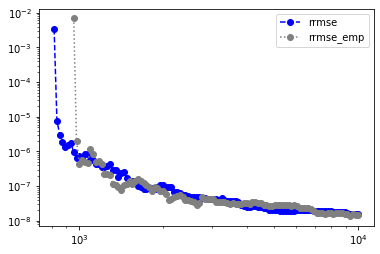

In [29]:
plt.loglog(sample_sizes[ind], rrmse[ind], label='rrmse',linestyle='--', marker='o', color='b')
plt.loglog(sample_sizes[ind], rrmse_emp[ind], label='rrmse_emp',linestyle='dotted', marker='o', color='grey')
plt.legend(loc='best')

In [30]:
appr_SI.shape, sample_sizes.shape

((110, 7), (110,))

/home/ivan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
/home/ivan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater


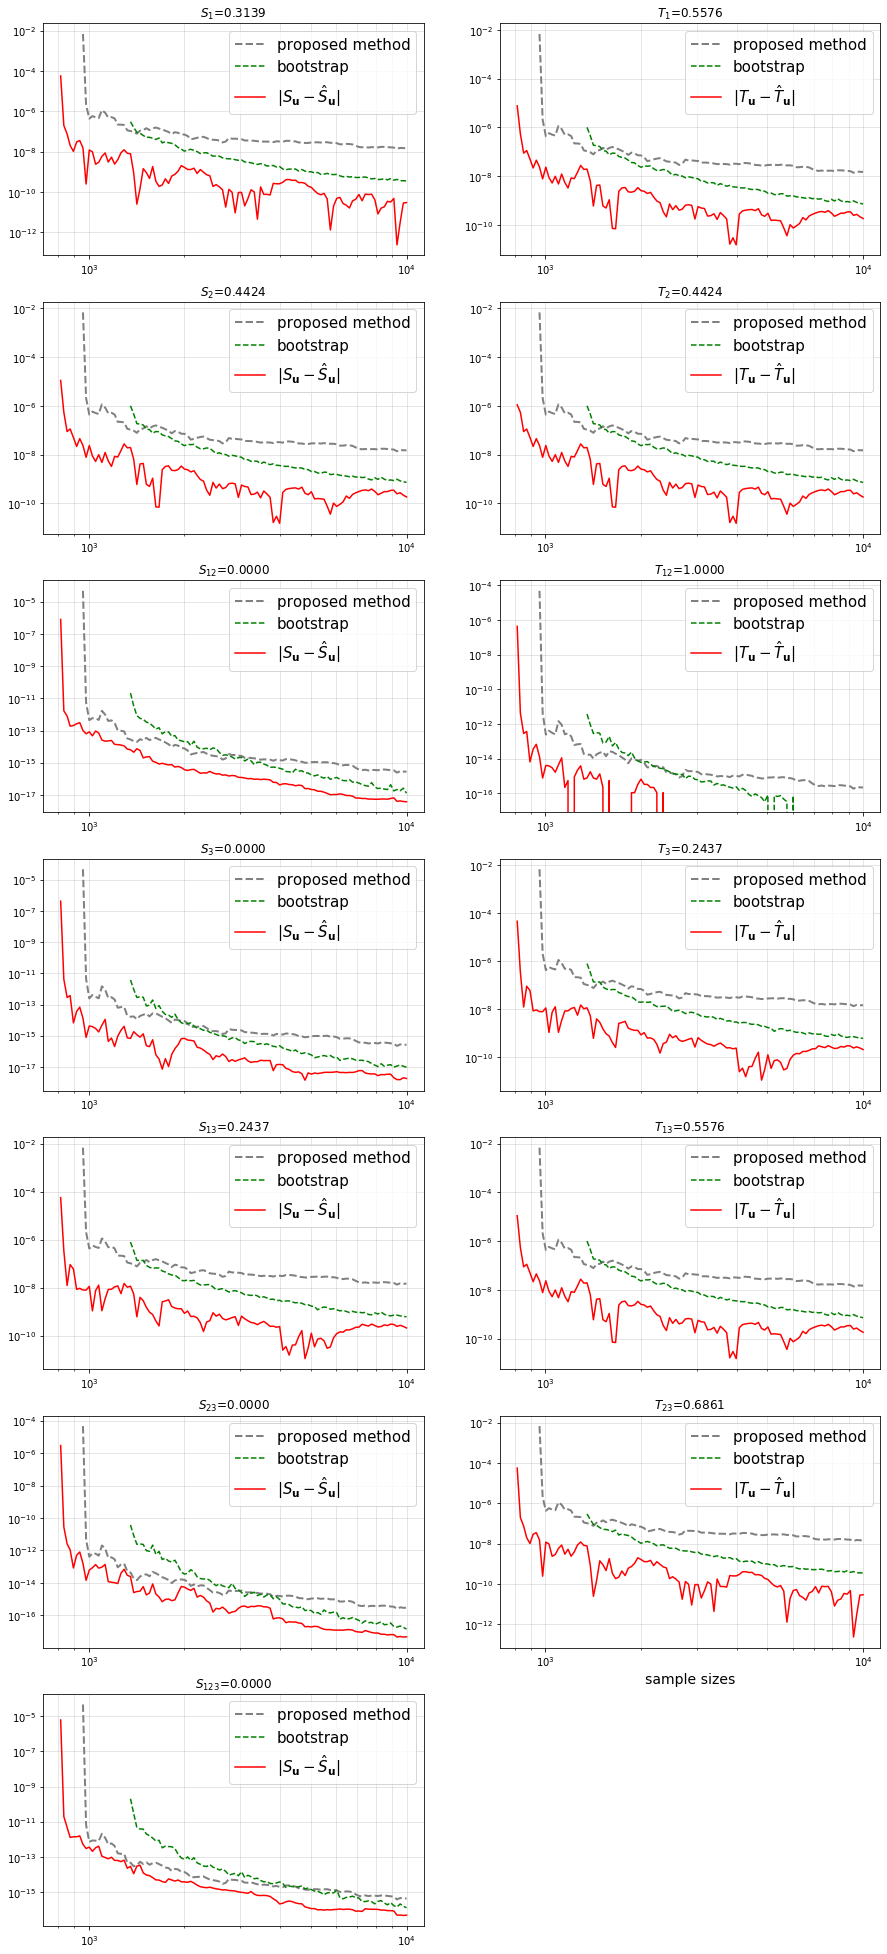

In [99]:
marker = ''


plt.figure(figsize=(15, 5*pics_num))
for i in range(pics_num):
    
    # Sobol indices
    temp_min = np.minimum(rrmse_emp + 2 * np.sqrt(appr_SI[:, i]),  
                          rrmse_emp + 2 * np.sqrt(1-appr_SI[:, i]))
    temp_min[temp_min > 1] = 1
    bound_S_emp = temp_min * rrmse_emp

    plt.subplot(pics_num, 2, i*2+1)
    plt.title('$S_{{{}}}$={:.4f}'.format(text_groups[i], S_full[i]))


    #!!!
    #plt.loglog(sample_sizes[ind], rrmse_emp[ind], label='rrmse_emp',linestyle='dotted', marker='o', color='grey')
    
    
    plt.loglog(sample_sizes[ind], bound_S_emp[ind], label='proposed method',
               linestyle='--', marker=marker, color='grey', linewidth=2)
    
    plt.loglog(sample_sizes[ind], 3*std_SI[ind, i], label='bootstrap',linestyle='--', color='g')
    
    
    
    plt.loglog(sample_sizes[ind], dS[ind, i], label='$|S_\mathbf{u} - \hat{S}_\mathbf{u}|$', 
               marker=marker, color='r')
    
    plt.legend(loc='best', fontsize=fontsize)
    plt.grid(b=True, which='both', color='#999999', axis='x',linestyle='-', alpha=0.3)
    plt.grid(b=True, which='major', color='#999999', axis='y',linestyle='-', alpha=0.3)
    
    # Total effects
    
    if i == pics_num-1:
        continue

    temp_min = np.minimum(rrmse_emp + 2 * np.sqrt(appr_TI[:, i]),  
                          rrmse_emp + 2 * np.sqrt(1-appr_TI[:, i]))
    temp_min[temp_min > 1] = 1
    bound_T_emp = temp_min * rrmse_emp


    plt.subplot(pics_num, 2, i*2+2)
    plt.title('$T_{{{}}}$={:.4f}'.format(text_groups[i], T_full[i]))

    plt.loglog(sample_sizes[ind], bound_T_emp[ind], label='proposed method',
               linestyle='--', marker=marker, color='grey', linewidth=2)
        
    plt.loglog(sample_sizes[ind], 3*std_TI[ind, i], label='bootstrap',linestyle='--', color='g')
    
    
    plt.loglog(sample_sizes[ind], dT[ind, i], label='$|T_\mathbf{u} - \hat{T}_\mathbf{u}|$',
                marker=marker, color='r')
    
    plt.legend(loc='best', fontsize=fontsize)
    plt.grid(b=True, which='both', color='#999999', axis='x',linestyle='-', alpha=0.3)
    plt.grid(b=True, which='major', color='#999999', axis='y',linestyle='-', alpha=0.3)
    
    if i == pics_num-2:
        plt.xlabel('sample sizes', fontsize=14)
        
if save_all:
    fname = exp_name+'_practical_each_u.png'
    plt.savefig(fname, dpi=300)

/home/ivan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]
/home/ivan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in greater


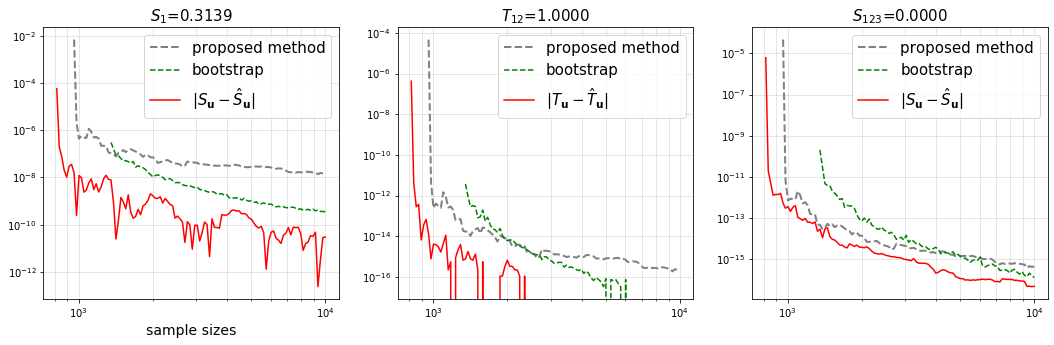

In [104]:
plt.figure(figsize=(18, 5))

cnt = 1


for i in range(pics_num):
    
    if i*2+1 in selected_pics: 
    
        # Sobol indices
        temp_min = np.minimum(rrmse_emp + 2 * np.sqrt(appr_SI[:, i]),  
                              rrmse_emp + 2 * np.sqrt(1-appr_SI[:, i]))
        temp_min[temp_min > 1] = 1
        bound_S_emp = temp_min * rrmse_emp
        
        #         plt.subplot(pics_num, 2, i*2+1)
        plt.subplot(1, len(selected_pics), cnt)
        cnt += 1
        
        plt.title('$S_{{{}}}$={:.4f}'.format(text_groups[i], S_full[i]), fontsize=fontsize)


        #!!!
        #plt.loglog(sample_sizes[ind], rrmse_emp[ind], label='rrmse_emp',linestyle='dotted', marker='o', color='grey')


        plt.loglog(sample_sizes[ind], bound_S_emp[ind], label='proposed method',
                   linestyle='--', marker=marker, color='grey', linewidth=2)

        plt.loglog(sample_sizes[ind], 3*std_SI[ind, i], label='bootstrap',linestyle='--', color='g')


        plt.loglog(sample_sizes[ind], dS[ind, i], label='$|S_\mathbf{u} - \hat{S}_\mathbf{u}|$', 
                   marker=marker, color='r')

        plt.legend(loc='best', fontsize=fontsize)
        plt.grid(b=True, which='both', color='#999999', axis='x',linestyle='-', alpha=0.3)
        plt.grid(b=True, which='major', color='#999999', axis='y',linestyle='-', alpha=0.3)
    
        if i*2+1 == 1:
            plt.xlabel('sample sizes', fontsize=14)



    # Total effects
    
    if i*2+2 in selected_pics: 
    
        temp_min = np.minimum(rrmse_emp + 2 * np.sqrt(appr_TI[:, i]),  
                              rrmse_emp + 2 * np.sqrt(1-appr_TI[:, i]))
        temp_min[temp_min > 1] = 1
        bound_T_emp = temp_min * rrmse_emp


        #         plt.subplot(pics_num, 2, i*2+2)
        plt.subplot(1, len(selected_pics), cnt)
        cnt += 1
        plt.title('$T_{{{}}}$={:.4f}'.format(text_groups[i], T_full[i]), fontsize=fontsize)

        plt.loglog(sample_sizes[ind], bound_T_emp[ind], label='proposed method',
                   linestyle='--', marker=marker, color='grey', linewidth=2)

        plt.loglog(sample_sizes[ind], 3*std_TI[ind, i], label='bootstrap',linestyle='--', color='g')


        plt.loglog(sample_sizes[ind], dT[ind, i], label='$|T_\mathbf{u} - \hat{T}_\mathbf{u}|$',
                    marker=marker, color='r')

        plt.legend(loc='best', fontsize=fontsize)
        plt.grid(b=True, which='both', color='#999999', axis='x',linestyle='-', alpha=0.3)
        plt.grid(b=True, which='major', color='#999999', axis='y',linestyle='-', alpha=0.3)
    
#     if i == pics_num-2:
#         plt.xlabel('sample sizes', fontsize=14)
        
if save_all:
    fname = exp_name+'_practical_each_u_selected.png'
    plt.savefig(fname, dpi=300, bbox_inches='tight', pad_inches=0.05)

In [32]:
rrmse_emp, sample_sizes

(array([           nan,            nan,            nan,            nan,
                   nan,            nan,            nan, 6.85968167e-03,
        2.07122683e-06, 4.35495311e-07, 5.78729803e-07, 5.04906801e-07,
        4.59712308e-07, 1.14489259e-06, 8.49291118e-07, 4.91528930e-07,
        5.16335477e-07, 4.41748098e-07, 2.20278717e-07, 2.18200076e-07,
        2.09426892e-07, 1.14059415e-07, 1.04942791e-07, 9.52524364e-08,
        7.78514687e-08, 1.10463148e-07, 1.16778427e-07, 1.45022432e-07,
        1.17964714e-07, 1.43137661e-07, 1.57228898e-07, 1.39580863e-07,
        1.25468155e-07, 1.09245361e-07, 9.41070937e-08, 7.39818987e-08,
        9.24633398e-08, 8.57623405e-08, 7.14348502e-08, 7.07218337e-08,
        5.95804709e-08, 4.09676246e-08, 4.40506399e-08, 4.87430598e-08,
        5.23343301e-08, 5.45023745e-08, 4.73806299e-08, 4.03851966e-08,
        3.89538406e-08, 3.80544489e-08, 3.54589893e-08, 2.86972002e-08,
        3.16472441e-08, 4.75674838e-08, 4.37582387e-08, 4.393433

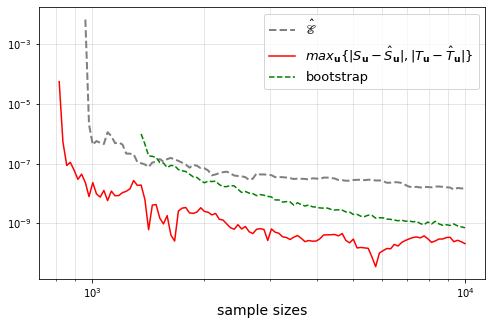

In [68]:
plt.figure(figsize=(8, 5))

plt.loglog(sample_sizes[ind], rrmse_emp[ind], label='$\hat{\mathscr{E}}$', color='grey', marker=marker, linestyle='--',
          linewidth=2) # linestyle='--'

plt.loglog(sample_sizes[ind], err_S[ind], 
           label='$max_\mathbf{u}\{|S_\mathbf{u} - \hat{S}_\mathbf{u}|, |T_\mathbf{u} - \hat{T}_\mathbf{u}|\}$', 
           marker=marker, color='r')

plt.loglog(sample_sizes[ind], 3*np.maximum(np.max(std_SI, axis=1), np.max(std_TI, axis=1))
[ind], label='bootstrap', color='g', marker=marker, linestyle='--') # ,linestyle='--' # '3 * max std_S std_T'


plt.legend(loc='best', fontsize=fontsize)

plt.grid(b=True, which='both', color='#999999', axis='x',linestyle='-', alpha=0.3)
plt.grid(b=True, which='major', color='#999999', axis='y',linestyle='-', alpha=0.3)

plt.xlabel('sample sizes', fontsize=14)

if save_all:
    fname = exp_name+'_practical.png'
    plt.savefig(fname, dpi=300)


In [42]:
del model, test_X, test_Y, X, Y

In [47]:
import dill
print(dill.__version__)

if os.path.isfile(db_name):
    print('Not saved: file %s already exists'%db_name)
    
else:
    if save_all:
        dill.dump_session(db_name)
        print(db_name)

0.3.1.1
experiments/test_accuracy_new_3_Ishigami.db
